In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
#import ROOT
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
import melp
import melp.taft

Welcome to JupyROOT 6.24/06


In [3]:
#import melp.legacy as melp

#test = melp.TileHitAngle("run42_20000.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [4]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [5]:
mu3e_detector = Detector.initFromROOT("run42_20000.root")
#mu3e_detector = Detector.initFromROOT("sorted_truth.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [6]:
#mu3e_detector.save("test_detector_file")

In [7]:
melp.select(mu3e_detector)

In [8]:
melp.info()

Detector(TileDetector=Loaded Tiles: 5824, SensorModules=<melp.src.sensor.SensorModule object at 0x7f0f9c248580>))


In [9]:
print(mu3e_detector)

Detector(TileDetector=Loaded Tiles: 5824, SensorModules=<melp.src.sensor.SensorModule object at 0x7f0f9c248580>))


In [10]:
melp.addTileHits("run42_20000.root", truth=True, traj=False)
melp.addTileHits("mu3e_run_000133_sorted_truth.root", truth=True, traj=False)
melp.addTileHits("mu3e_run_000134_sorted_truth.root", truth=True, traj=False)

In [11]:
mu3e_detector.TileDetector.tile[200000].hits

[Hit(edep=1.2783763906256802, mc_i=48476, tid=-1, frame_id=68, primary=-43213, run_id=-1, hid=4, impact_vec=[-2.4933425810023024, 1.1216931355944117, -1.897180201694329], trajectory=None, pos=None),
 Hit(edep=0.8387702474511345, mc_i=648003, tid=-1, frame_id=1028, primary=729528, run_id=-1, hid=2, impact_vec=[-28.489492176297436, 6.985334844529037, -29.964500814829577], trajectory=None, pos=None),
 Hit(edep=0.11322953289494984, mc_i=653614, tid=-1, frame_id=1038, primary=760728, run_id=-1, hid=1, impact_vec=[-9.004092029847184, 4.668157302457942, 14.155976513043326], trajectory=None, pos=None),
 Hit(edep=2.157540798467353, mc_i=983558, tid=-1, frame_id=1563, primary=1153468, run_id=-1, hid=3, impact_vec=[2.5216361327387666, -0.025770810317476474, 2.5334470391902446], trajectory=None, pos=None),
 Hit(edep=1.4037568270650993, mc_i=1283785, tid=-1, frame_id=2077, primary=1450930, run_id=-1, hid=1, impact_vec=[-25.075322946398483, 25.40853358116103, 15.87788877093116], trajectory=None, pos

In [12]:
mu3e_detector.TileDetector.tile[200000].info()

------------------------------
Tile information

  - Tile ID:  200000
  - Position:  [59.828, -10.035394536951584, -566.915]
  - Direction:  [1.0, 0.0, 0.0]
  - Total Hits:  196
  - Truth Time Misal:  -3.995442484365776
  - Calibrated Time Misal:  0.0
------------------------------


In [13]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [42, 133, 134]
  - Loaded Runs (Pixel):  []
------------------------------


In [14]:
rate_data = melp.getHitRate()

In [15]:
rate_data_np = np.array(rate_data)

In [16]:
result_rate = np.zeros((52*2,6))

for z_pos in range(2*52):
    result_rate[z_pos][0] = rate_data_np[0][z_pos*56+1]
    for phi_pos in range(56):
        result_rate[z_pos][1] += rate_data_np[1][z_pos*56+1+phi_pos] # total
        result_rate[z_pos][2] += rate_data_np[2][z_pos*56+1+phi_pos]
        result_rate[z_pos][3] += rate_data_np[3][z_pos*56+1+phi_pos]
        result_rate[z_pos][4] += rate_data_np[4][z_pos*56+1+phi_pos]
        result_rate[z_pos][5] += rate_data_np[5][z_pos*56+1+phi_pos] # edep
        

In [17]:
# Umrechnung Rate -> pro sekunde
number_of_frames = 20000*3
frame_length = 64 #ns
ns_to_s = 1e-9

run_time_length = (number_of_frames*frame_length*ns_to_s) # s

number_of_tiles_phi = 56

fac = 1/(run_time_length*number_of_tiles_phi)
fac_khz = fac/1000 


In [18]:
#import seaborn as sns


In [19]:
#plt.bar(result_rate.T[0], result_rate.T[1], width = 2)
#sns.set_theme(style="darkgrid")

#fig = plt.figure(figsize=(10, 8))

#sns.histplot(x=result_rate.T[0], weights=result_rate.T[1]*fac_khz, bins=220, label="total rate")
#sns.histplot(x=result_rate.T[0], weights=result_rate.T[2]*fac_khz, bins=220, label="primary rate")
#sns.histplot(x=result_rate.T[0], weights=result_rate.T[3]*fac_khz, bins=220, label="secondary rate")
#sns.histplot(x=result_rate.T[0], weights=result_rate.T[4]*fac_khz, bins=220, label="tertiary rate")
#plt.legend(fontsize=15)
#plt.yticks([])
#plt.ylabel("Rate [khz]")
#plt.xlabel("z - position")
#plt.show()

In [20]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["264653","e76f51","e9c46a","2a9d8f"]) 
# https://coolors.co/palettes/popular
plt.rcParams.update({'font.size': 20})


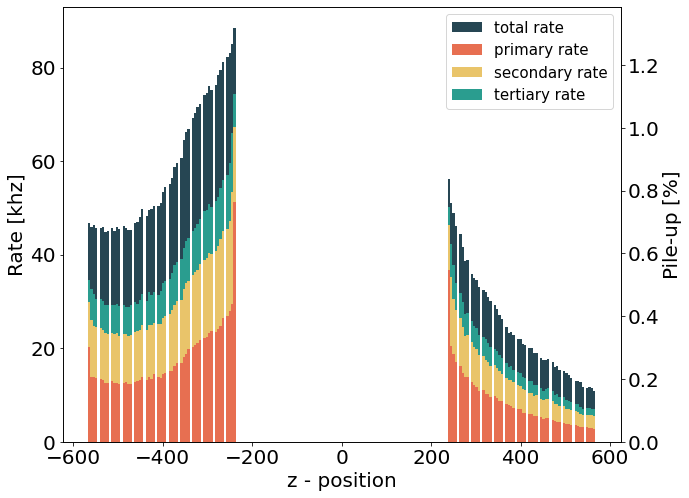

In [30]:
#plt.bar(result_rate.T[0], result_rate.T[1], width = 2)
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(result_rate.T[0], weights=result_rate.T[1]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="total rate")
#plt.hist(result_rate.T[0], weights=result_rate.T[2]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="primary rate", stacked=True)
#plt.hist(result_rate.T[0], weights=result_rate.T[3]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="secondary rate", stacked=True)
ax.hist([result_rate.T[0],result_rate.T[0],result_rate.T[0]], weights=[result_rate.T[2]*fac_khz, result_rate.T[3]*fac_khz, result_rate.T[4]*fac_khz], bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label=["primary rate","secondary rate","tertiary rate"], stacked=True)
ax.legend(fontsize=15)
ax.set_ylabel("Rate [khz]")
ax.set_xlabel("z - position")

ax2 = ax.twinx()
mn, mx = ax.get_ylim()
ax2.set_ylim(mn*1, (1-np.exp(-mx*1000*150*10**-9))*100)
ax2.set_ylabel("Pile-up [%]")

plt.show()

In [22]:
rate_total_1 = sum((result_rate.T[2]*fac_khz)[:52])/52
rate_total_2 = sum((result_rate.T[2]*fac_khz)[52:])/52

print("Upstream Rate:", rate_total_1)
print("Downstream Rate:", rate_total_2)
print("Max rate:", max(result_rate.T[2]*fac_khz))
print("Min rate:", min(result_rate.T[2]*fac_khz))

Upstream Rate: 17.79007125686813
Downstream Rate: 8.369015424679489
Max rate: 51.283482142857146
Min rate: 2.6925223214285716


In [23]:
rate_total_1 = sum((result_rate.T[1]*fac_khz)[:52])/52
rate_total_2 = sum((result_rate.T[1]*fac_khz)[52:])/52

print("Upstream Rate:", rate_total_1)
print("Downstream Rate:", rate_total_2)
print("Max rate:", max(result_rate.T[1]*fac_khz))
print("Min rate:", min(result_rate.T[1]*fac_khz))

Upstream Rate: 58.742917239010985
Downstream Rate: 24.776427999084248
Max rate: 88.52771577380952
Min rate: 10.793340773809524


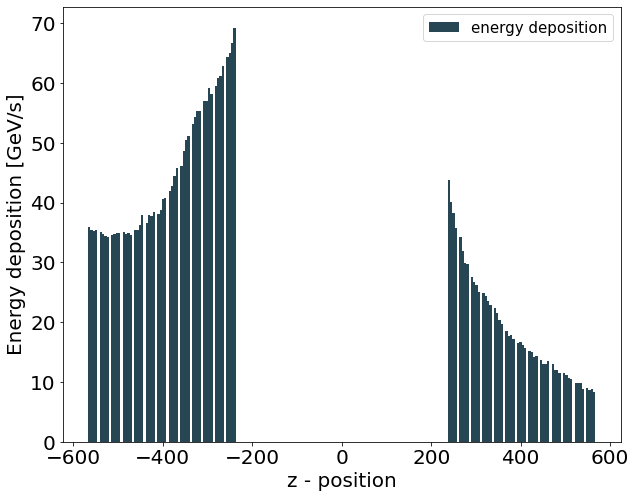

In [24]:
#plt.bar(result_rate.T[0], result_rate.T[1], width = 2)
fig = plt.figure(figsize=(10, 8))
plt.hist(result_rate.T[0], weights=result_rate.T[5]*fac/1000, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="energy deposition")
plt.legend(fontsize=15)
#plt.yticks([])
plt.ylabel("Energy deposition [GeV/s]")
plt.xlabel("z - position")
plt.show()

In [25]:
edep_hits = []
for tile in mu3e_detector.TileDetector.tile:

    for hit in mu3e_detector.TileDetector.tile[tile].hits:

        edep = hit.edep
        edep_hits.append(edep)

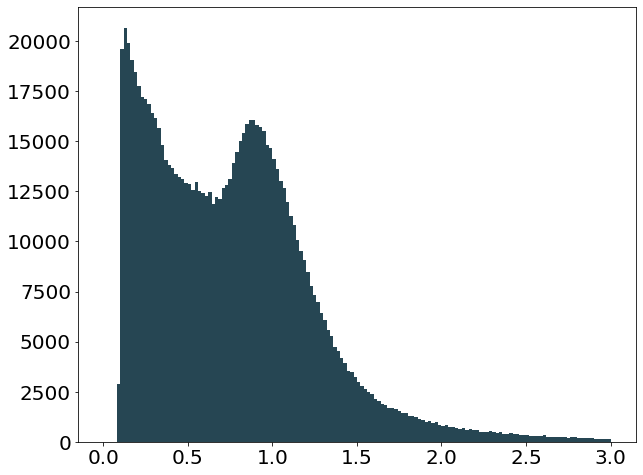

0.07914118225005383


In [26]:
fig = plt.figure(figsize=(10, 8))
plt.hist(edep_hits,bins=150, range=(0,3))
plt.show()
print(min(edep_hits))

In [27]:
#melp.addSensorHits("run42_20000.root", traj=True)

In [28]:
hitangle = melp.getHitAngle(rec_type="Truth", angle="theta", hit_type="primary")

In [29]:
#print(hitangle[1])

In [30]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [42, 133, 134]
  - Loaded Runs (Pixel):  []
------------------------------


In [31]:
#mu3e_detector.SensorsModules.sensor[1].hit

In [32]:
#mu3e_detector.TileDetector.tile[200000].hits

In [33]:
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

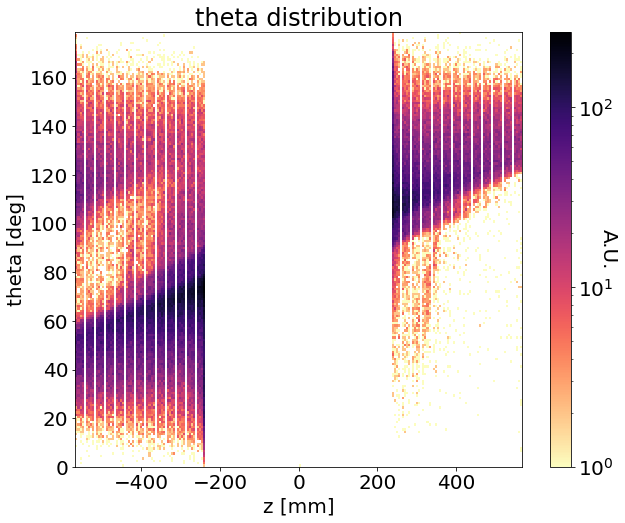

In [34]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="magma_r", norm = mpl.colors.LogNorm())
plt.ylabel("theta [deg]")
plt.xlabel("z [mm]")
cbar = plt.colorbar(im)
cbar.set_label('A.U.', rotation=270)
plt.show()

In [35]:
from scipy.optimize import curve_fit

In [36]:
def fit_func(x, a, b):
    return a*x + b

In [37]:
pos = []
station_test = 200000

for z in range(len(mu3e_detector.TileDetector.row_ids(0, station_test))):
    z_pos = mu3e_detector.TileDetector.tile[mu3e_detector.TileDetector.column_ids(z, station_test)[0]].pos
    pos.append(z_pos[2])

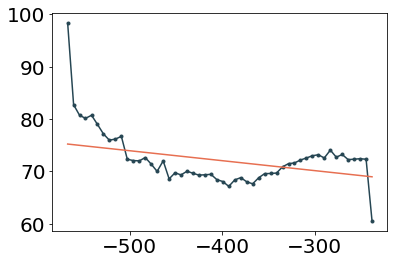

Average Angle Upstream: 72.01026079759177
Angle Fit Params:  [-1.89952399e-02  6.44490576e+01]


52

In [38]:
average_angle = []

for i in range(0,110):
    if sum(binned_data[i]) != 0:
        average_angle.append(np.average(np.array(range(0,180,1)),weights=binned_data[i]))
        
popt, cov = curve_fit(fit_func, pos[1:-2], average_angle[1:-2])
plt.plot(pos, average_angle, marker=".")
plt.plot(pos, fit_func(np.array(pos), popt[0],popt[1]))
plt.show()
print("Average Angle Upstream:", np.median(average_angle))
print("Angle Fit Params: ", popt)
len(average_angle)

In [39]:
pos = []
station_test = 300000

for z in range(len(mu3e_detector.TileDetector.row_ids(0, station_test))):
    z_pos = mu3e_detector.TileDetector.tile[mu3e_detector.TileDetector.column_ids(z, station_test)[0]].pos
    pos.append(z_pos[2])

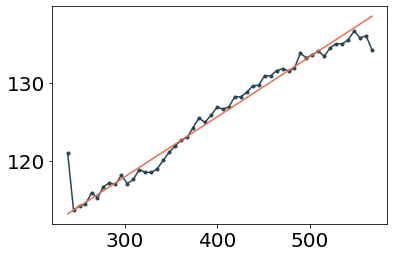

Average Angle Downstream: 126.6500754147813
Angle Fit Params:  [7.74428315e-02 9.46888658e+01]


53

In [42]:
average_angle = []

for i in range(110,220):
    if sum(binned_data[i]) != 0:
        average_angle.append(np.average(np.array(range(0,180,1)),weights=binned_data[i]))
        
popt, cov = curve_fit(fit_func, pos[1:-2], average_angle[2:-2])
plt.plot(pos, average_angle[1:], marker=".")
plt.plot(pos, fit_func(np.array(pos), popt[0],popt[1]))
plt.show()
print("Average Angle Downstream:", np.median(average_angle))
print("Angle Fit Params: ", popt)
len(average_angle)

In [36]:
hitangle = melp.getHitAngle(rec_type="Truth", angle="theta", hit_type="all")
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

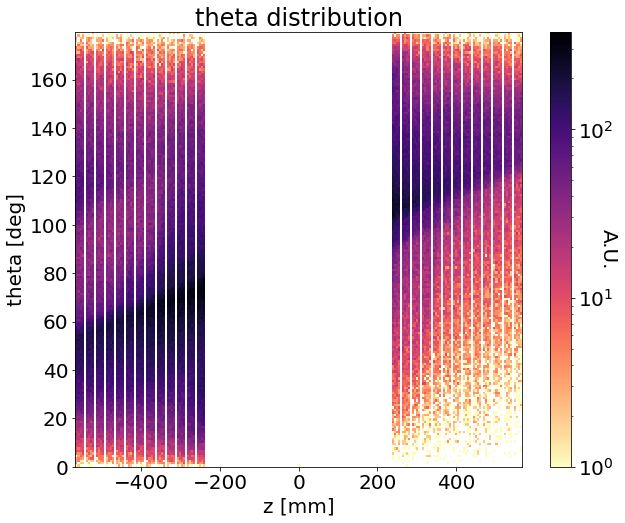

In [37]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="magma_r", norm = mpl.colors.LogNorm())
plt.ylabel("theta [deg]")
plt.xlabel("z [mm]")
cbar = plt.colorbar(im)
cbar.set_label('A.U.', rotation=270)
plt.show()

In [38]:
hitangle = melp.getHitAngle(rec_type="Truth", angle="phi", hit_type="primary")
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

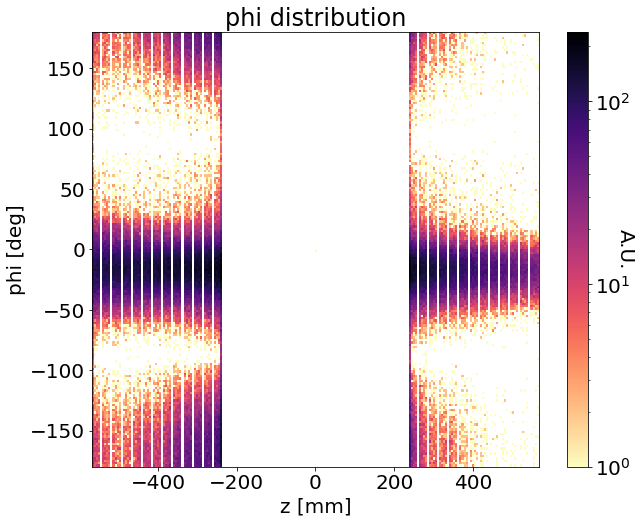

In [39]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, title='phi distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="magma_r", norm = mpl.colors.LogNorm())
plt.ylabel("phi [deg]")
plt.xlabel("z [mm]")
cbar = plt.colorbar(im)
cbar.set_label('A.U.', rotation=270)
plt.show()

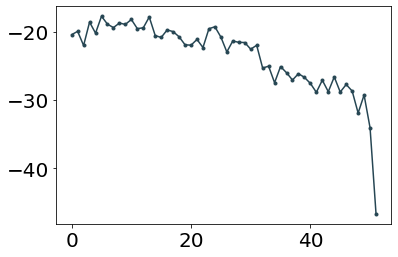

Average Angle Upstream: -21.938314521944836


In [40]:
average_angle = []

for i in range(0,110):
    if sum(binned_data[i]) != 0:
        average_angle.append(np.average(np.array(range(-180,180,2)),weights=binned_data[i]))
plt.plot(average_angle, marker=".")
plt.show()
print("Average Angle Upstream:", np.median(average_angle))

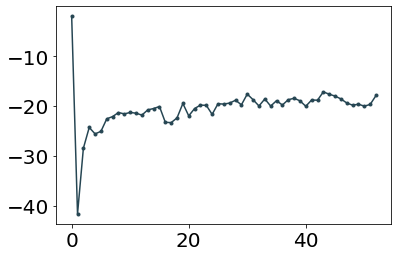

Average Angle Upstream: -19.81654135338346


In [41]:
average_angle = []

for i in range(110,220):
    if sum(binned_data[i]) != 0:
        average_angle.append(np.average(np.array(range(-180,180,2)),weights=binned_data[i]))
plt.plot(average_angle, marker=".")
plt.show()
print("Average Angle Upstream:", np.median(average_angle))

In [42]:
hitangle = melp.getHitAngle(rec_type="Truth", angle="phi", hit_type="all")
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

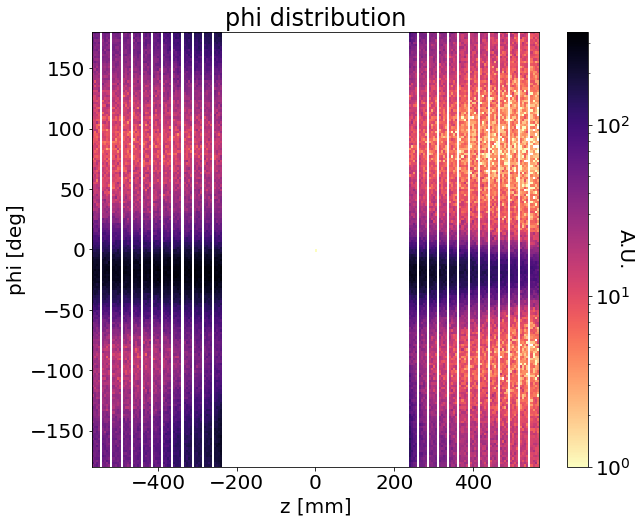

In [43]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, title='phi distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="magma_r", norm = mpl.colors.LogNorm())
plt.ylabel("phi [deg]")
plt.xlabel("z [mm]")
cbar = plt.colorbar(im)
cbar.set_label('A.U.', rotation=270)
plt.show()

In [44]:
hitangle = melp.getHitAngle(rec_type="Truth", angle="norm", hit_type="primary")
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

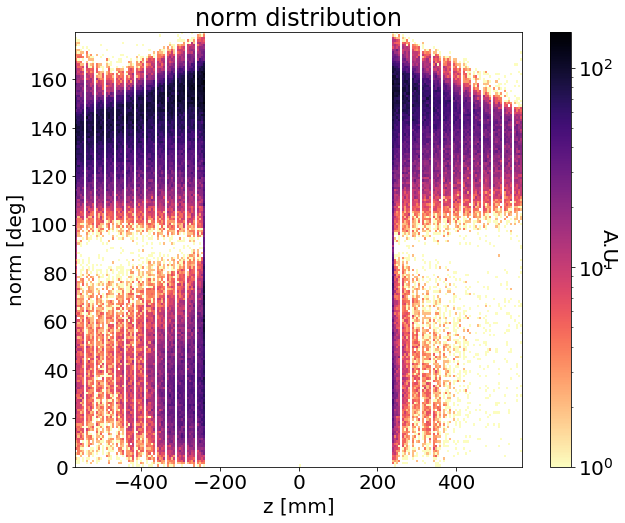

In [45]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, title='norm distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="magma_r", norm = mpl.colors.LogNorm())
plt.ylabel("norm [deg]")
plt.xlabel("z [mm]")
cbar = plt.colorbar(im)
cbar.set_label('A.U.', rotation=270)
plt.show()

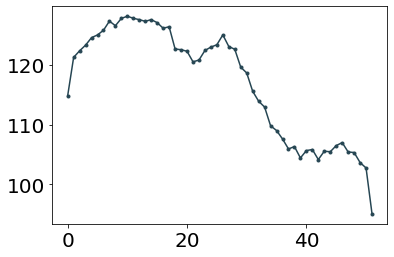

-121.01170574956438


In [46]:
average_angle = []

for i in range(0,110):
    if sum(binned_data[i]) != 0:
        average_angle.append(np.average(np.array(range(0,180,1)),weights=binned_data[i]))
plt.plot(average_angle, marker=".")
plt.show()
print(-np.median(average_angle))

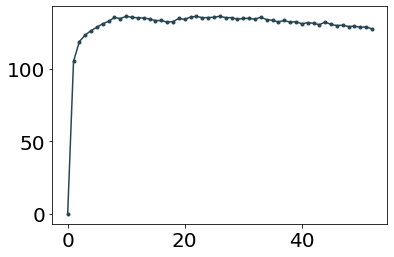

-133.47238703788224


In [47]:
average_angle = []

for i in range(110,220):
    if sum(binned_data[i]) != 0:
        average_angle.append(np.average(np.array(range(0,180,1)),weights=binned_data[i]))
plt.plot(average_angle, marker=".")
plt.show()
print(-np.median(average_angle))

In [11]:
hid = []

for tileid in mu3e_detector.TileDetector.tile:
    for hit in mu3e_detector.TileDetector.tile[tileid].hits:
        hid.append(hit.hid)

In [12]:
hid_hist, bin_edges = np.histogram(hid, bins=14, range=(0,15))

norm = hid_hist[0]
print(norm)
for i in range(0,14):
    hid_hist[i] = hid_hist[i] / norm *100
    pass

292513


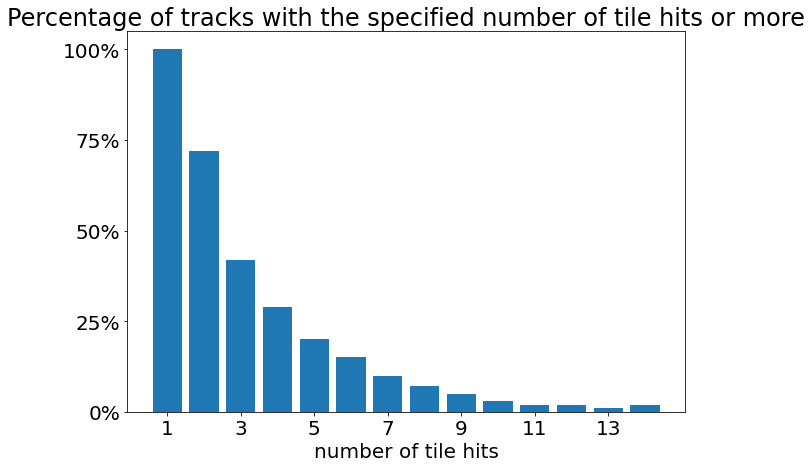

In [13]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 7))

plt.bar(range(1,15),hid_hist)
plt.yticks(np.arange(0, 101, step=25), ['0%','25%', '50%', '75%', '100%'])  # Set label locations.
plt.xticks(np.arange(1,15, step = 2))
plt.xlabel("number of tile hits")
plt.title("Percentage of tracks with the specified number of tile hits or more")
plt.show()

In [51]:
x = 0
for i in hid:
    if i == 1:
        x+= 1
x

292513

In [52]:
hid_hist[0]

100

In [33]:
hid_new = np.delete(hid, np.where(np.asarray(hid) == 1))
np.mean(hid_new)

4.5487514168071135

In [21]:
np.average(range(2,14), weights=hid_hist[1:-1])

4.019230769230769

In [32]:
np.mean(hid)

3.4372473016960767